# Importing Data

In [2]:
import pandas as pd

In [3]:
delaney_with_descriptors_url = 'https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv'
df = pd.read_csv(delaney_with_descriptors_url)

In [4]:
df.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


In [5]:
df.shape

(1144, 5)

In [8]:
df.to_csv('solubility_dataset.csv', index=False)

In [6]:
X = df.drop('logS', axis=1)
Y = df.logS

---

# Model Building

In [7]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
model = linear_model.LinearRegression()
model.fit(X, Y)

LinearRegression()

## Model Prediction

In [9]:
Y_pred = model.predict(X)
Y_pred

array([-2.77628837, -2.38661054, -2.77190108, ..., -4.73721496,
       -4.19663007, -2.61784284])

## Model Performance

In [10]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Coefficients: [-0.74173609 -0.00659927  0.00320051 -0.42316387]
Intercept: 0.2565006830997194
Mean squared error (MSE): 1.01
Coefficient of determination (R^2): 0.77


## Model Equation

In [11]:
print('LogS = %.2f %.2f LogP %.4f MW + %.4f RB %.2f AP' % (model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2], model.coef_[3] ) )

LogS = 0.26 -0.74 LogP -0.0066 MW + 0.0032 RB -0.42 AP


## Data Visualization

In [13]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental LogS')

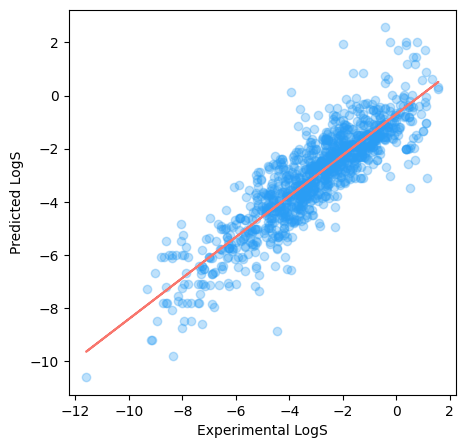

In [16]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#2A9DF4", alpha=0.3)

z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y, p(Y), "#F8766D")
plt.ylabel("Predicted LogS")
plt.xlabel("Experimental LogS")

## Exporting the Model

In [14]:
import pickle

In [17]:
pickle.dump(model, open('solubility_model.pkl', 'wb'))